In [2]:
import numpy as np
import matplotlib.pyplot as plt

The `plot_spheres` function in the next (hidden) cell will render the rigid body using **matplotlib**.

<div class="alert alert-info">
    This is not intended as a full tutorial on <b>matplotlib</b> - see the <a href="https://matplotlib.org/">documentation</a> if you would like to learn more.
</div>

In [3]:
def sphere_coords(rad,pos):   
    # draw sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = rad * np.cos(u)*np.sin(v) + pos[0]
    y = rad * np.sin(u)*np.sin(v) + pos[1]
    z = rad * np.cos(v) + pos[2]
    return x,y,z

def plot_spheres(pos,ax,rad):
    for i in range(len(pos)):
        pos_tmp = pos[i,:]
        x,y,z = sphere_coords(rad,pos_tmp)
        ax.plot_wireframe(x,y,z,color='coral')

## Overview

### Questions

* What is a rigid body? 
* What properties do I need to input to simulate correct dynamics?

### Objectives

* Define a rigid body
    * Define local coordinates
    * Define rigid body center position and orientation
    * Note other parameters to describe the rigid body
       * Moment of inertia tensor
       * Mass
       * Angular Velocity
       * Velocity

# What is a rigid body? 

A **rigid body** is an incompressible body composed of **constituent** bodies that do not interact with each other. 

# What coordinates are rigid bodies defined in?

A rigid body is defined by **local** and **global** coordinates.

**Local coordinates:** Coordinates in the frame of reference of the rigid body. This coordinate system is used to define the positions and orientations of the reference particle. 


**Global coordinates:** Coordinates in the frame of reference of the system. These coordinates are used to define the rigid body centers and orientations.

# What physical quantities do I need to define a rigid body?

Under the assumption of a uniform density distribution, a rigid body is defined by 8 things:

* **Mass -** the total mass of the rigid body.
* **Moment of inertia tensor -** how mass is distributed throughout the rigid body as well as how the rigid body responds to torque.
* **Velocity -** velocity of the center of mass of the rigid body.
* **Angular velocity -** rotational velocity of the rigid body.
* **Position** in global coordinates, defined as a positional vector (in the frame of reference of the rigid body, position is always [0.,0.,0.]).
    * Example: position = [1.,1.,1.]
* **Orientation** in global coordinates, defined as a quaternion (in the frame of reference of the rigid body the orientation is always: [0.,0.,0.,1.]).
    * Example: orientation = [0.,0.,0.,1.]
* **Constituent Particle Positions** in local coordinates, defined as a positional vector from the frame of reference of the rigid body.
* **Constituent Particle Orientation** in local coordinates, defined as a quaternion from the frame of reference of the rigid body.
* **Force field -**  In simulation we assume that the sum of the forces on the constituent particles is the force acting on the rigid body. 

# Rigid Dumbell Example

This section goes over how to define a rigid body that is defined as two spheres of radius 1 'fused' together end to end.

To simplify our analysis we assume each sphere is a point particle of mass 1. 

The positions of the spheres in local coordinates of the rigid body are: 

\begin{equation}
    [[-1,0,0],\\
     [1,0,0]]
\end{equation}

A visualization of the spheres in local coordinates is shown below with vectors projected to their central positions. 

<function matplotlib.pyplot.show(close=None, block=None)>

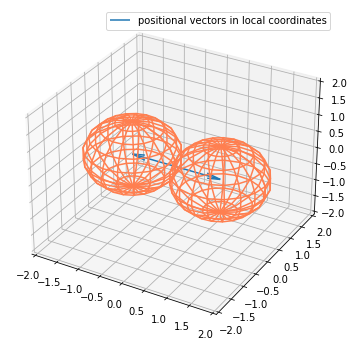

In [4]:
# Visualization for the spheres in matplotlib as a wiremesh.
sphere_pos = np.array([[1,0,0],[-1,0,0]])
vectors = np.array([[0,0,0,1.,0,0],[0,0,0,-1.,0,0]])

X, Y, Z, U, V, W = zip(*vectors)

radius = 1.

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()
ax = fig.add_subplot(133, projection='3d')

plot_spheres(sphere_pos,ax,radius)
ax.quiver(X,Y,Z,U,V,W,label='positional vectors in local coordinates')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
plt.legend()
plt.show

# Getting the mass and moment of inertia

Because each sphere is assumed to be a point particle with mass m rotating about point (0,0,0), we can get the moment of inertia of each point particle by integrating over volume, with the general process outlined here: https://farside.ph.utexas.edu/teaching/336k/Newtonhtml/node64.html. 

As a note, the density of a point particle is defined as, $\rho = m \delta(x-x_0)\delta(y-y_0)\delta(z-z_0)$ where $x_0$, $y_0$, and $z_0$ are the position of the point particle, and m is the mass (1 in this case) and $\delta$ is the delta function. 

Off diagonal terms are zero for these point particles, and the moment of inertia tensor is the same for each particle written as:

\begin{bmatrix}
0&0&0\\
0& 1& 0\\
0&0&1
\end{bmatrix}

The sum of the moment of inertia of the rigid body is the sum of the moment of inertia of the constituents

\begin{equation}
    I_{tot} = \sum I_{constituents}
\end{equation}

The moment of inertia tensor of the rigid body is therefore:

\begin{bmatrix}
0&0&0\\
0& 2& 0\\
0&0&2
\end{bmatrix}